# Feature Importance
## Classification Feature Selection (Numerical Input & Categorical Output)

Feature importance refers to a class of techniques for assigning scores to input features to a predictive model that indicates the relative importance of each feature when making a prediction. Feature importance scores can be calculated for problems that involve predicting a numerical value, called regression, and those problems that involve predicting a class label, called classification.

Feature importance scores can provide insight into the dataset. The relative scores can highlight which features may be most relevant to the target, and the converse, which features are the least relevant. This may be interpreted by a domain expert and could be used as the basis for gathering more or different data.

Feature importance scores can provide insight into the model. Most importance scores are calculated by a predictive model that has been fit on the dataset. Inspecting the importance score provides insight into that specific model and which features are the most important and least important to the model when making a prediction. This is a type of model interpretation that can be performed for those models that support it.

Feature importance can be used to improve a predictive model. This can be achieved by using the importance scores to select those features to delete (lowest scores) or those features to keep (highest scores). This is a type of feature selection and can simplify the problem that is being modeled, speed up the modeling process (deleting features is called dimensionality reduction), and in some cases, improve the performance of the model.

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

## Load data

We will use the make_classification() function to create a test binary classification dataset.

The dataset will have 1,000 examples, with 10 input features, five of which will be informative and the remaining five will be redundant. We will fix the random number seed to ensure we get the same examples each time the code is run.

In [2]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
print(X.shape, y.shape)

(1000, 10) (1000,)


## Linear regression feature importance

We can fit a LogisticRegression model on the regression dataset and retrieve the coeff_ property that contains the coefficients found for each input variable.

These coefficients can provide the basis for a crude feature importance score. This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

In [3]:
# define the model
model = LogisticRegression()

In [4]:
# fit the model
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
# get importance
importance = model.coef_[0]

In [6]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.16320
Feature: 1, Score: -0.64301
Feature: 2, Score: 0.48497
Feature: 3, Score: -0.46190
Feature: 4, Score: 0.18432
Feature: 5, Score: -0.11978
Feature: 6, Score: -0.40602
Feature: 7, Score: 0.03772
Feature: 8, Score: -0.51785
Feature: 9, Score: 0.26540


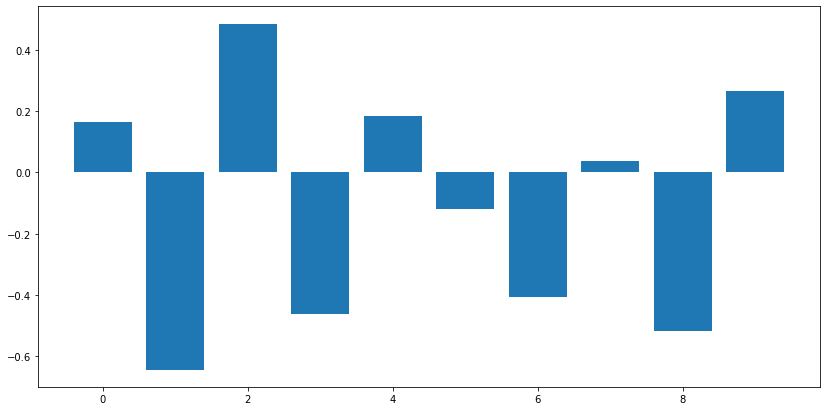

In [7]:
# plot feature importance
plt.figure(figsize=(14,7))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Running the example fits the model, then reports the coefficient value for each feature.

Recall this is a classification problem with classes 0 and 1. Notice that the coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.

No clear pattern of important and unimportant features can be identified from these results, at least from what I can tell.